# Plotting with matplotlib

### Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### Getting the pop2019 DataFrame

In [2]:
csv ='../csvs/nc-est2019-agesex-res.csv'
pops = pd.read_csv(csv, usecols=['SEX', 'AGE', 'POPESTIMATE2019'])

def fix_sex(sex):
    if sex == 0:
        return 'T'
    elif sex == 1:
        return 'M'
    else: # 2
        return 'F'
    
pops.SEX = pops.SEX.apply(fix_sex)

pops = pops.pivot(index='AGE', columns='SEX', values='POPESTIMATE2019')

pops

SEX,F,M,T
AGE,,,
0,1847935,1935117,3783052
1,1871014,1958585,3829599
2,1916500,2005544,3922044
3,1955655,2043010,3998665
4,1976372,2066951,4043323
...,...,...,...
96,111417,46046,157463
97,84358,32611,116969
98,62607,23543,86150


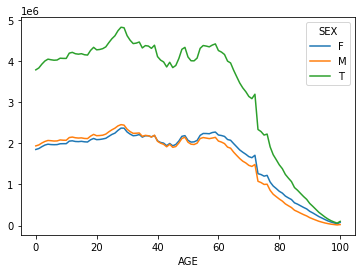

In [17]:
pops.plot();

### Create a Line Plot

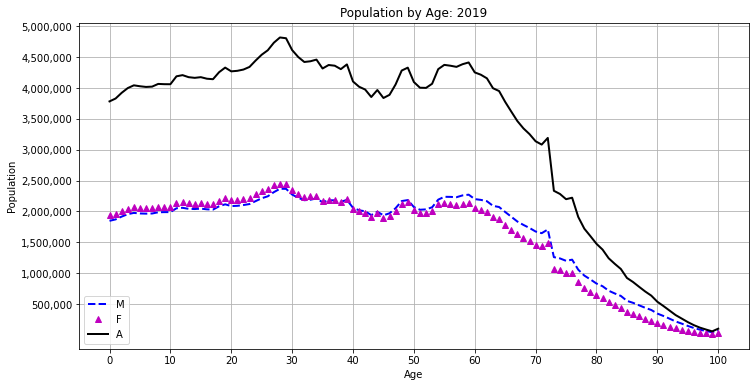

In [20]:
# Create the plot.
plt_pop = pops.plot(
    title = "Population by Age: 2019",
    style=['b--', 'm^', 'k-'],
    figsize=(12, 6),
    lw=2
)

# Include gridlines.
plt_pop.grid(True)

# Set the x and y labels.
plt_pop.set_xlabel('Age')
plt_pop.set_ylabel('Population')

# Create the legend.
plt_pop.legend(['M', 'F', 'A'], loc="lower left")

# Set x and y ticks.
plt_pop.set_xticks(np.arange(0, 101, 10))

yticks = np.arange(500000, 5000001, 500000)
ytick_labels = pd.Series(yticks).apply(lambda y: "{:,}".format(y))

plt_pop.set_yticks(yticks)
plt_pop.set_yticklabels(ytick_labels);

### Create a Bar Plot

In [21]:
csv ='../csvs/mantle.csv'
mantle = pd.read_csv(csv, index_col='Year',
                     usecols=['Year', '2B', '3B', 'HR'])
mantle

,2B,3B,HR
Year,,,
1951,11,5,13
1952,37,7,23
1953,24,3,21
1954,17,12,27
1955,25,11,37
...,...,...,...
1964,25,2,35
1965,12,1,19
1966,12,1,23


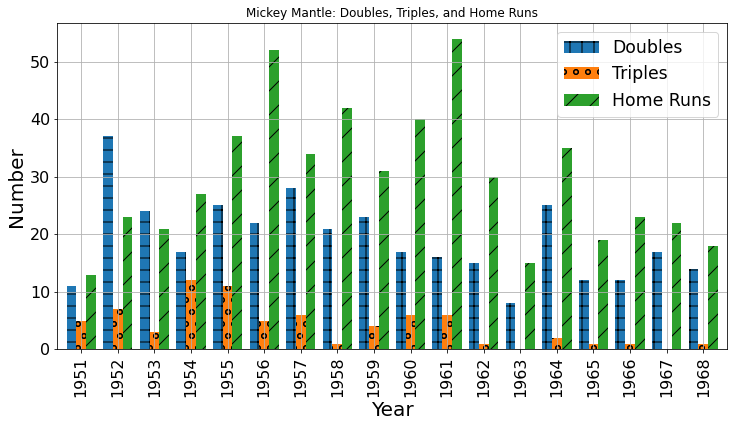

In [34]:
# Create the plot.
plt_mantle = mantle.plot(
    kind='bar',
    title = 'Mickey Mantle: Doubles, Triples, and Home Runs',
    figsize=(12, 6),
    width=.8,
    fontsize=16
)

# Include gridlines.
plt_mantle.grid(True)

# Set the x and y labels.
plt_mantle.set_ylabel('Number', fontsize=20)
plt_mantle.set_xlabel('Year', fontsize=20)

# Hatch the bars.
bars = plt_mantle.patches

for i in np.arange(0, 18):
    bars[i].set_hatch('+')
for i in np.arange(18, 36):
    bars[i].set_hatch('o')
for i in np.arange(36, 54):
    bars[i].set_hatch('/')

# Create the legend.
plt_mantle.legend(['Doubles', 'Triples', 'Home Runs'],
                  loc="upper right", fontsize='xx-large');

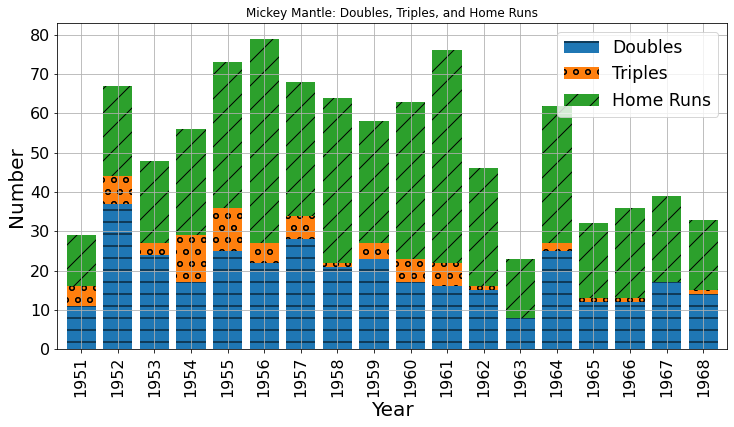

In [16]:
plt_mantle = mantle.plot(kind='bar',
                         title = 'Mickey Mantle: Doubles, Triples, and Home Runs',
                         figsize=(12, 6),
                         width=.8,
                         fontsize=16,
                         stacked=True)

plt_mantle.set_ylabel('Number', fontsize=20)
plt_mantle.set_xlabel('Year', fontsize=20)
plt_mantle.grid(True)

bars = plt_mantle.patches

for i in np.arange(0, 18):
    bars[i].set_hatch('-')
for i in np.arange(18, 36):
    bars[i].set_hatch('o')
for i in np.arange(36, 54):
    bars[i].set_hatch('/')
    
plt_mantle.legend(['Doubles','Triples','Home Runs'],
                  loc="upper right", fontsize='xx-large');